<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/SearchGrid_Tips_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tips.csv**

Abrindo base de dados previamente gravada no Drive e analisando as suas variáveis.

Variável de interesse deve ser construída para indicar se uma gorjeta é maior ou menor do que mediana.

total_bill e tip tem que ser dropadas pois há endogeneidade com a variável de interesse.

sex, smoker, day e time precisam ser convertidas.

In [1]:
import pandas as pd

df = pd.read_csv('/content/tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Criando a variável com a relação de tip e total_bill.

Se maior que a mediana, então tip_size = 1 (um boa gorjeta)

Se menor ou igual a mediana, tip_size = 0 (uma gorjeta ruim)

In [2]:
df['tip_size'] = df['tip'] / df['total_bill']
df.head(1)
median = df['tip_size'].median()
df['tip_size'] = df.apply(lambda row: 1 if row['tip_size'] > median else 0, axis=1)


Convertendo o dia da semana em variáveis dummy.

Observar se a distribuição de 'day' bate com as distribuições dos dias da semana individuais.

In [3]:
print(df['day'].value_counts())
df['sun'] = df.apply(lambda row: 1 if row['day'] == 'Sun' else 0, axis=1)
df['sat'] = df.apply(lambda row: 1 if row['day'] == 'Sat' else 0, axis=1)
df['fri'] = df.apply(lambda row: 1 if row['day'] == 'Fri' else 0, axis=1)
df['thu'] = df.apply(lambda row: 1 if row['day'] == 'Thur' else 0, axis=1)
print(df['sun'].value_counts())
print(df['sat'].value_counts())
print(df['fri'].value_counts())
print(df['thu'].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
sun
0    168
1     76
Name: count, dtype: int64
sat
0    157
1     87
Name: count, dtype: int64
fri
0    225
1     19
Name: count, dtype: int64
thu
0    182
1     62
Name: count, dtype: int64


Convertendo variáveis binárias e conferindo as quantidades.

In [4]:
print(df['time'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
df['dinner'] = df.apply(lambda row: 1 if row['time'] == 'Dinner' else 0, axis=1)
df['female'] = df.apply(lambda row: 1 if row['sex'] == 'Female' else 0, axis=1)
df['smoke'] = df.apply(lambda row: 1 if row['smoker'] == 'Yes' else 0, axis=1)
print(df['dinner'].value_counts())
print(df['female'].value_counts())
print(df['smoke'].value_counts())


time
Dinner    176
Lunch      68
Name: count, dtype: int64
sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
dinner
1    176
0     68
Name: count, dtype: int64
female
0    157
1     87
Name: count, dtype: int64
smoke
0    151
1     93
Name: count, dtype: int64


Cópia de segurança do meu df original.

Removendo as colunas que não são mais necessárias.

Conferindo se tenho sometne variáveis numéricas no meu dataset.

In [5]:
df1 = df.copy()
del df1['total_bill']
del df1['tip']
del df1['time']
del df1['sex']
del df1['day']
del df1['smoker']
df1.head()


,size,tip_size,sun,sat,fri,thu,dinner,female,smoke
0,2,0,1,0,0,0,1,1,0
1,3,1,1,0,0,0,1,0,0
2,3,1,1,0,0,0,1,0,0
3,2,0,1,0,0,0,1,0,0
4,4,0,1,0,0,0,1,1,0


**Tudo perfeito para iniciar os testes com os classificadores! \o/**


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df1.drop('tip_size', axis='columns')
y = df1['tip_size']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {
  'random_state':[True],
  'n_estimators': [10,20],
  'max_depth': range(1,20)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))
best_estimator = gs.best_estimator_


0.6639344262295082


In [7]:
gs.best_params_


{'max_depth': 8, 'n_estimators': 10, 'random_state': True}

In [8]:
results = pd.DataFrame(gs.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015835,0.000560,0.002835,0.000054,1,10,True,"{'max_depth': 1, 'n_estimators': 10, 'random_s...",0.448980,0.510204,0.346939,0.428571,0.500000,0.446939,0.058582,31
1,0.032829,0.007340,0.004503,0.002048,1,20,True,"{'max_depth': 1, 'n_estimators': 20, 'random_s...",0.571429,0.530612,0.367347,0.428571,0.395833,0.458759,0.078847,16
2,0.016098,0.000582,0.003008,0.000278,2,10,True,"{'max_depth': 2, 'n_estimators': 10, 'random_s...",0.551020,0.346939,0.367347,0.428571,0.437500,0.426276,0.071357,35
3,0.028737,0.000417,0.003508,0.000233,2,20,True,"{'max_depth': 2, 'n_estimators': 20, 'random_s...",0.551020,0.510204,0.346939,0.448980,0.416667,0.454762,0.071344,29
4,0.016962,0.002872,0.002866,0.000029,3,10,True,"{'max_depth': 3, 'n_estimators': 10, 'random_s...",0.489796,0.448980,0.387755,0.448980,0.500000,0.455102,0.039573,28
5,0.033318,0.002201,0.003713,0.000303,3,20,True,"{'max_depth': 3, 'n_estimators': 20, 'random_s...",0.510204,0.510204,0.367347,0.489796,0.458333,0.467177,0.053401,2
6,0.016845,0.001024,0.003200,0.000761,4,10,True,"{'max_depth': 4, 'n_estimators': 10, 'random_s...",0.510204,0.346939,0.346939,0.469388,0.437500,0.422194,0.065626,37
7,0.031420,0.003056,0.003401,0.000047,4,20,True,"{'max_depth': 4, 'n_estimators': 20, 'random_s...",0.571429,0.367347,0.387755,0.469388,0.458333,0.450850,0.071962,30
8,0.016651,0.001333,0.002936,0.000126,5,10,True,"{'max_depth': 5, 'n_estimators': 10, 'random_s...",0.448980,0.387755,0.346939,0.551020,0.375000,0.421939,0.072650,38
9,0.030792,0.001278,0.003643,0.000361,5,20,True,"{'max_depth': 5, 'n_estimators': 20, 'random_s...",0.469388,0.428571,0.387755,0.489796,0.375000,0.430102,0.044584,33


In [9]:
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,15)
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))


0.5491803278688525


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

params = {
  'solver': ['lsqr','svd'],
}

gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))


0.5286885245901639


<Axes: >

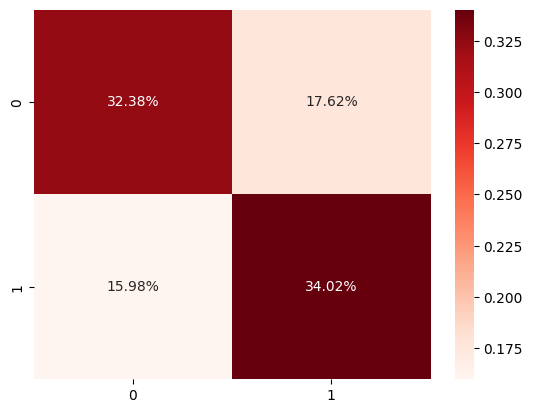

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

In [12]:
wine = pd.read_csv('/content/wine.xls')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [13]:
print(wine['alcohol'].describe())

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [14]:
print(wine['alcohol'].value_counts())

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64


In [15]:
mediana = wine['alcohol'].median()
wine['alcohol'] = wine.apply(lambda row: 1 if row['alcohol'] > mediana else 0, axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,0,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,0,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,0,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,1,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,1,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,1,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0,bad


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

In [17]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
colunas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
len(colunas)

11

In [19]:
x_train, x_test, y_train, y_test = train_test_split(wine[colunas],
                                                    wine[['quality']], test_size=0.5, random_state=42)

In [20]:
classificador = DecisionTreeClassifier()
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.71375


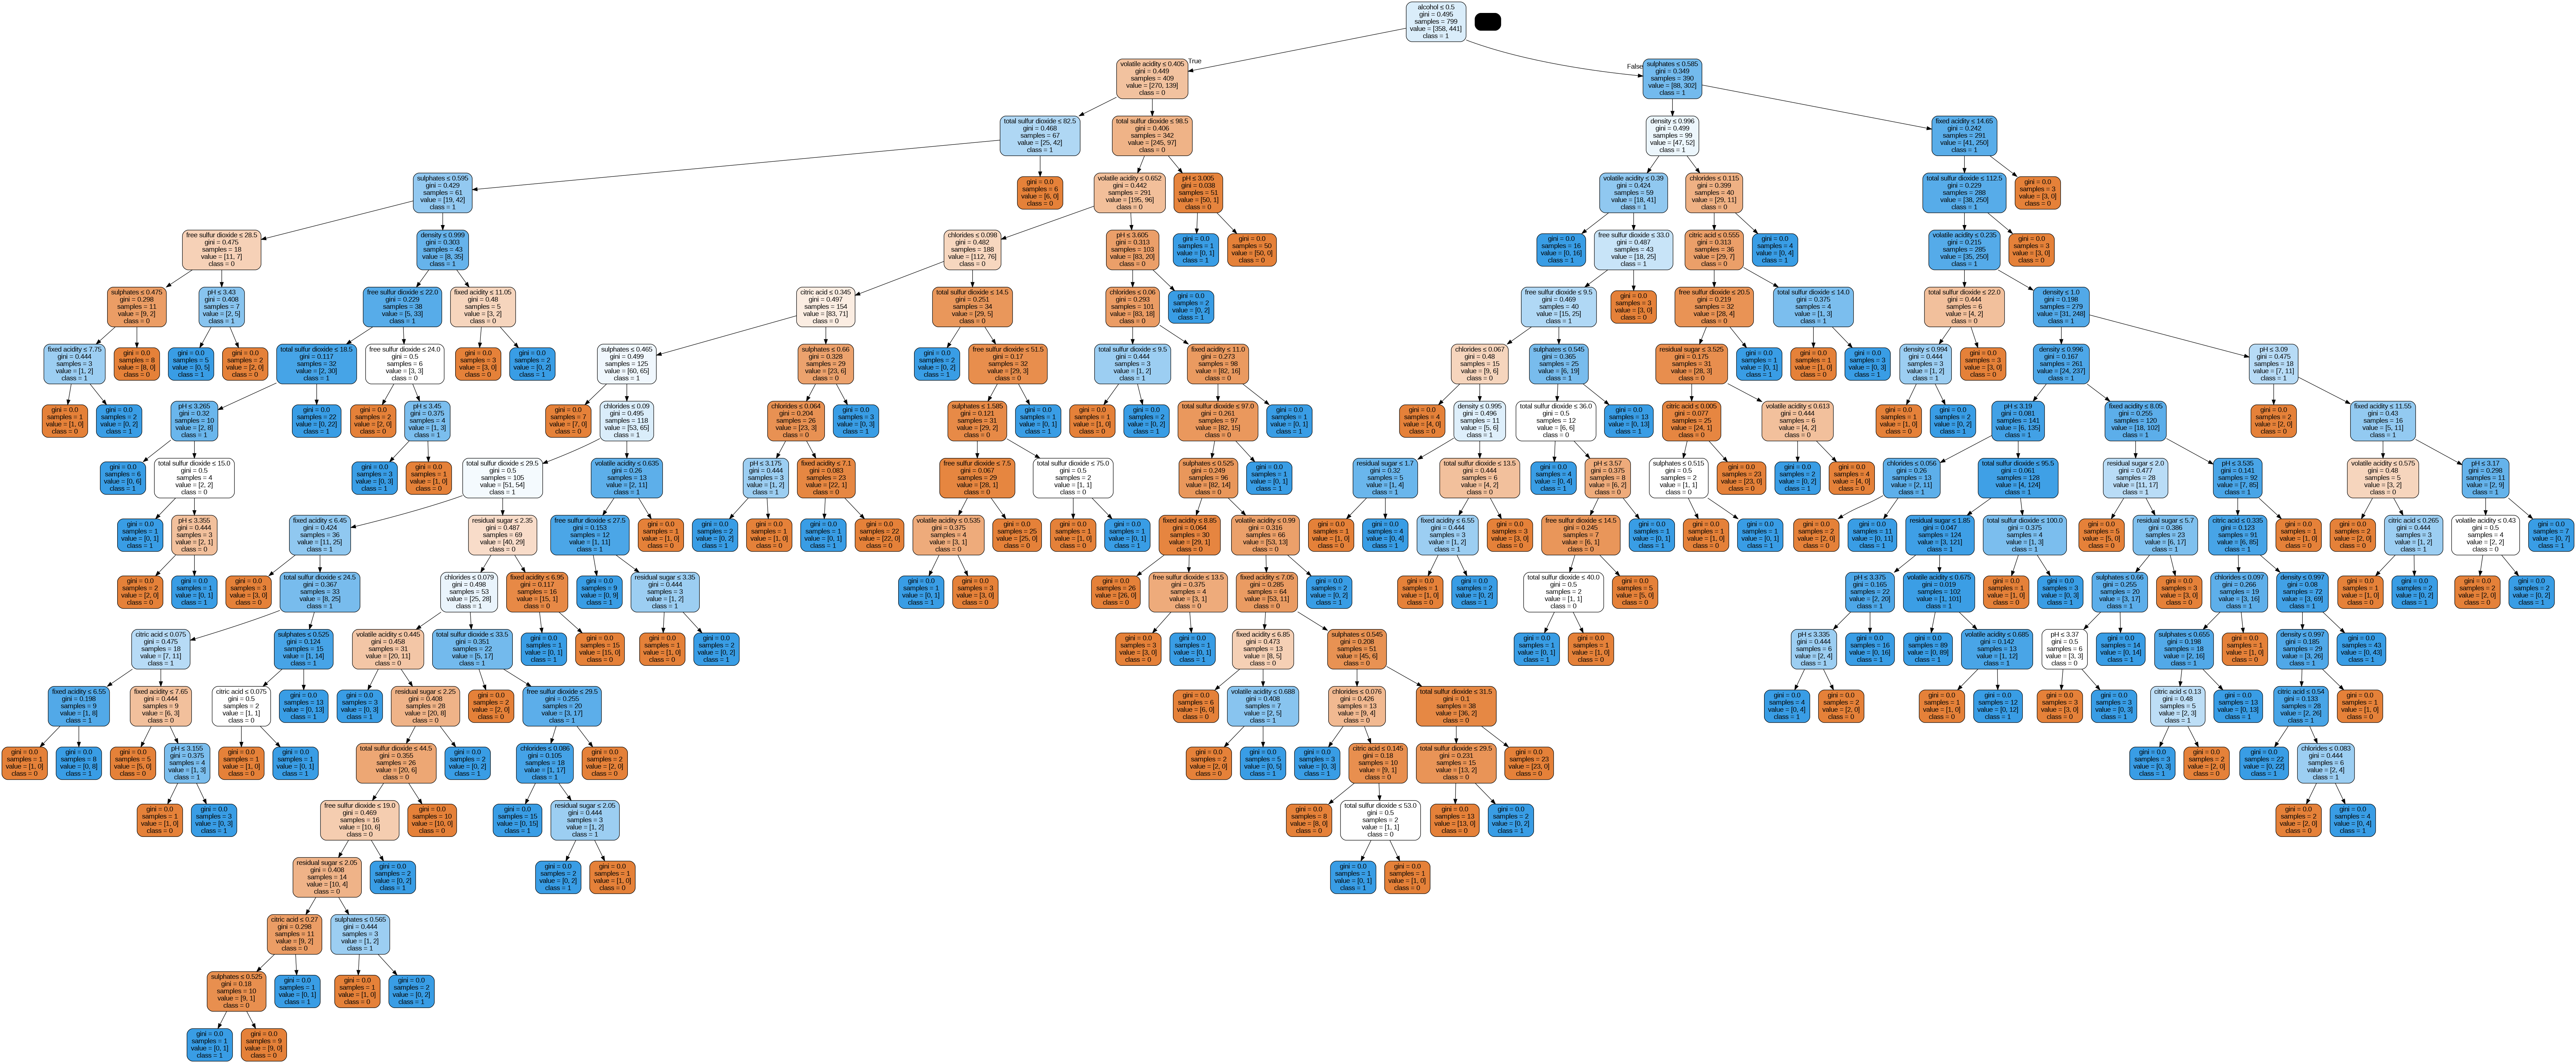

In [21]:
class_names = [str(i) for i in range(12)]
dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = colunas, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [22]:
min_samples_leaf_list = range(1, 6)
criterios_list = ['gini', 'log_loss']
max_depth_list = range(1, 21)
resultados = []

In [23]:
for min_samples_leaf in min_samples_leaf_list:
  for criterio in criterios_list:
    for max_depth in max_depth_list:
      modelo = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, criterion=criterio, max_depth=max_depth)
      modelo.fit(x_train, y_train)
      y_pred = modelo.predict(x_test)
      acuracia = accuracy_score(y_test, y_pred)
      resultados.append([min_samples_leaf, criterio, max_depth, acuracia])

In [24]:
resultados_df = pd.DataFrame(resultados, columns=['min_samples_leaf', 'criterio', 'max_depth', 'acuracia'])
resultados_df

,min_samples_leaf,criterio,max_depth,acuracia
0,1,gini,1,0.68875
1,1,gini,2,0.69250
2,1,gini,3,0.70750
3,1,gini,4,0.72750
4,1,gini,5,0.70000
...,...,...,...,...
195,5,log_loss,16,0.71000
196,5,log_loss,17,0.70750
197,5,log_loss,18,0.71750
198,5,log_loss,19,0.70500


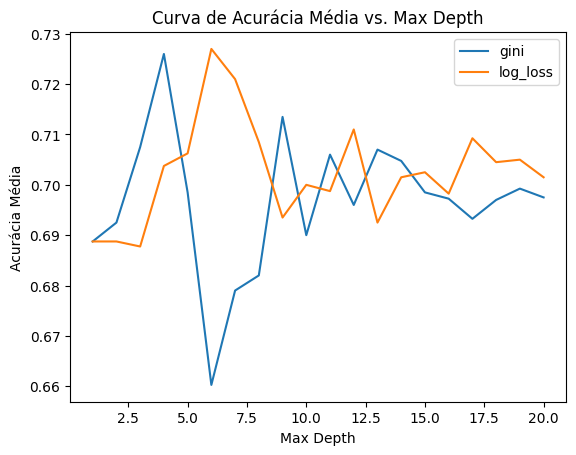

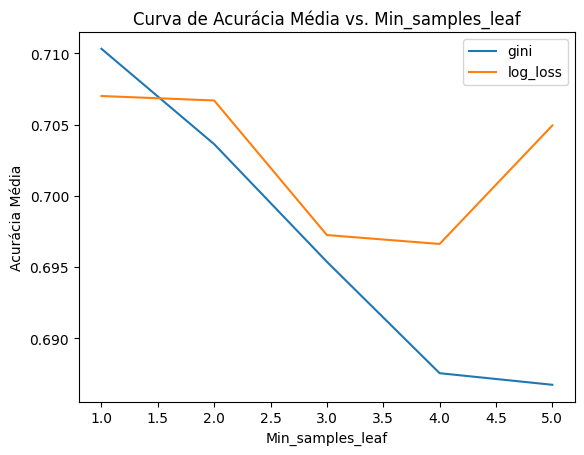

In [25]:
mediana_acuracia = resultados_df.groupby(['max_depth','criterio'])['acuracia'].mean().unstack()

fig, ax = plt.subplots()

for criterio in mediana_acuracia.columns:
    ax.plot(mediana_acuracia.index, mediana_acuracia[criterio], label=criterio)

ax.set_xlabel('Max Depth')
ax.set_ylabel('Acurácia Média')
ax.set_title('Curva de Acurácia Média vs. Max Depth')
ax.legend()
plt.show()

mediana_acuracia = resultados_df.groupby(['min_samples_leaf','criterio'])['acuracia'].mean().unstack()

fig, ax = plt.subplots()

for criterio in mediana_acuracia.columns:
    ax.plot(mediana_acuracia.index, mediana_acuracia[criterio], label=criterio)

ax.set_xlabel('Min_samples_leaf')
ax.set_ylabel('Acurácia Média')
ax.set_title('Curva de Acurácia Média vs. Min_samples_leaf')
ax.legend()
plt.show()

In [26]:
lista_n_estimators = [10, 30, 60]
criterios_list = ['gini', 'log_loss']
max_depth_list = range(1,21)
resultados = []

In [28]:
for n_estimator in lista_n_estimators:
  for criterio in criterios_list:
    for max_depth in max_depth_list:
      modelo = RandomForestClassifier(n_estimators=n_estimator, criterion=criterio, max_depth=max_depth)
      modelo.fit(x_train, y_train.values.ravel())
      y_pred = modelo.predict(x_test)
      acuracia = accuracy_score(y_test, y_pred)
      resultados.append([n_estimator, criterio, max_depth, acuracia])

In [29]:
resultados_df = pd.DataFrame(resultados, columns=['n_estimators', 'criterio', 'max_depth', 'acuracia'])
resultados_df

,n_estimators,criterio,max_depth,acuracia
0,10,gini,1,0.70375
1,10,gini,2,0.70000
2,10,gini,3,0.73875
3,10,gini,4,0.71500
4,10,gini,5,0.73375
...,...,...,...,...
235,60,log_loss,16,0.76500
236,60,log_loss,17,0.78375
237,60,log_loss,18,0.77500
238,60,log_loss,19,0.77875


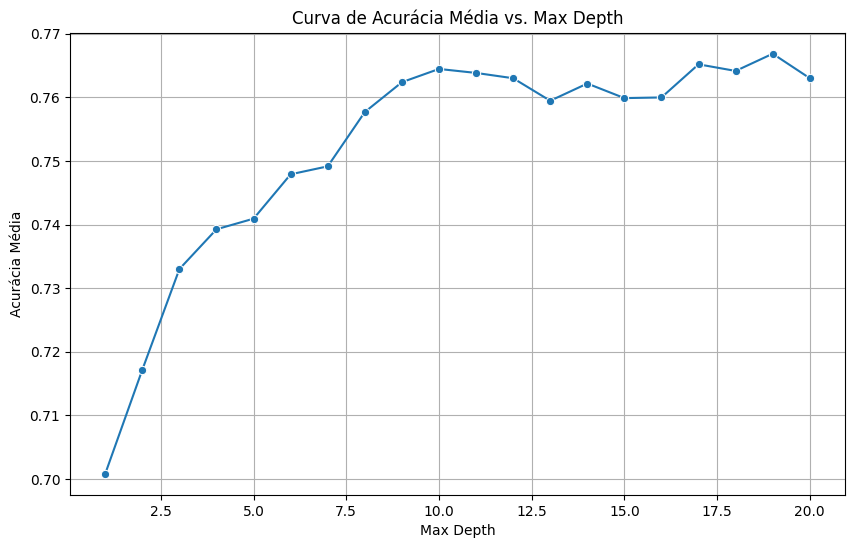

    max_depth  acuracia
0           1  0.700833
1           2  0.717187
2           3  0.733021
3           4  0.739271
4           5  0.740937
5           6  0.747917
6           7  0.749167
7           8  0.757708
8           9  0.762396
9          10  0.764479
10         11  0.763854
11         12  0.763021
12         13  0.759479
13         14  0.762188
14         15  0.759896
15         16  0.760000
16         17  0.765208
17         18  0.764167
18         19  0.766875
19         20  0.763021


In [30]:
resultados_agrupados = resultados_df.groupby('max_depth')['acuracia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_agrupados, x='max_depth', y='acuracia', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Max Depth')
plt.grid(True)
plt.show()
print(resultados_agrupados)

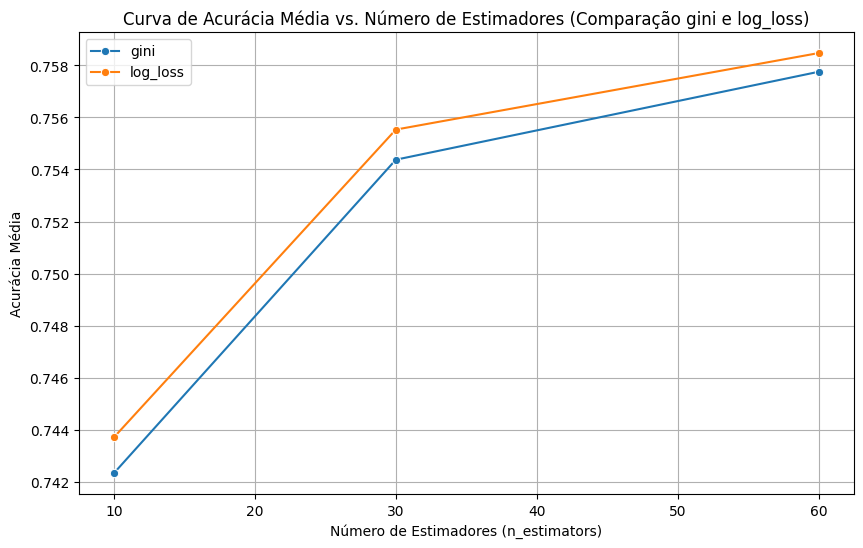

Resultados para critério 'gini':
   n_estimators  acuracia
0            10  0.742344
1            30  0.754375
2            60  0.757750

Resultados para critério 'log_loss':
   n_estimators  acuracia
0            10  0.743719
1            30  0.755531
2            60  0.758469


In [31]:
resultados_gini = resultados_df[resultados_df['criterio'] == 'gini']
resultados_gini_agrupados = resultados_gini.groupby('n_estimators')['acuracia'].mean().reset_index()

resultados_log_loss = resultados_df[resultados_df['criterio'] == 'log_loss']
resultados_log_loss_agrupados = resultados_log_loss.groupby('n_estimators')['acuracia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_gini_agrupados, x='n_estimators', y='acuracia', marker='o', label='gini')
sns.lineplot(data=resultados_log_loss_agrupados, x='n_estimators', y='acuracia', marker='o', label='log_loss')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Número de Estimadores (Comparação gini e log_loss)')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados para critério 'gini':")
print(resultados_gini_agrupados)
print("\nResultados para critério 'log_loss':")
print(resultados_log_loss_agrupados)

In [32]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,0,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,0,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,0,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,1,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,1,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,1,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0,bad


In [33]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
print(wine['alcohol'].value_counts())
print(wine['quality'].value_counts())

alcohol
0    842
1    757
Name: count, dtype: int64
quality
good    855
bad     744
Name: count, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = wine.drop('quality', axis='columns')
y = wine['quality']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {
  'random_state':[True],
  'n_estimators': [10,30, 60],
  'max_depth': range(1,20)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))
best_estimator = gs.best_estimator_

0.8073796122576611


In [37]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 60, 'random_state': True}

In [38]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039811,0.008677,0.006528,0.000539,1,10,True,"{'max_depth': 1, 'n_estimators': 10, 'random_s...",0.628125,0.643750,0.684375,0.693750,0.702194,0.670439,0.029151,57
1,0.089359,0.001697,0.008043,0.000657,1,30,True,"{'max_depth': 1, 'n_estimators': 30, 'random_s...",0.700000,0.687500,0.765625,0.743750,0.749216,0.729218,0.030102,12
2,0.160887,0.039691,0.013360,0.006626,1,60,True,"{'max_depth': 1, 'n_estimators': 60, 'random_s...",0.700000,0.681250,0.756250,0.731250,0.742947,0.722339,0.027718,26
3,0.063597,0.023912,0.009224,0.003759,2,10,True,"{'max_depth': 2, 'n_estimators': 10, 'random_s...",0.687500,0.678125,0.756250,0.740625,0.717868,0.716074,0.029922,38
4,0.117605,0.018585,0.016384,0.009422,2,30,True,"{'max_depth': 2, 'n_estimators': 30, 'random_s...",0.703125,0.690625,0.765625,0.728125,0.727273,0.722955,0.025708,24
5,0.341983,0.047528,0.023111,0.008789,2,60,True,"{'max_depth': 2, 'n_estimators': 60, 'random_s...",0.706250,0.696875,0.771875,0.731250,0.746082,0.730466,0.027107,11
6,0.070313,0.016954,0.011772,0.003542,3,10,True,"{'max_depth': 3, 'n_estimators': 10, 'random_s...",0.734375,0.690625,0.765625,0.746875,0.730408,0.733582,0.024736,7
7,0.152688,0.005729,0.010633,0.003313,3,30,True,"{'max_depth': 3, 'n_estimators': 30, 'random_s...",0.715625,0.709375,0.771875,0.743750,0.733542,0.734833,0.022228,2
8,0.353813,0.118891,0.023899,0.011879,3,60,True,"{'max_depth': 3, 'n_estimators': 60, 'random_s...",0.715625,0.696875,0.771875,0.737500,0.742947,0.732964,0.025445,8
9,0.042284,0.001106,0.010209,0.005470,4,10,True,"{'max_depth': 4, 'n_estimators': 10, 'random_s...",0.675000,0.709375,0.787500,0.740625,0.749216,0.732343,0.037977,9


In [39]:
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,20),
  'min_samples_leaf': range(1, 5),
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))

0.7886178861788617


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

params = {
  'solver': ['lsqr','svd'],
}

gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))

0.7348342714196373


<Axes: >

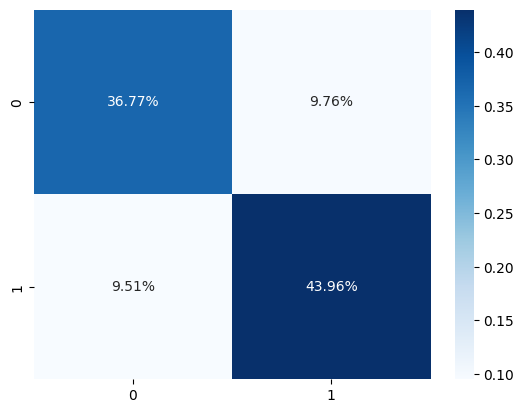

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')